# Initial Setup

In [6]:
#!pip install fastai --upgrade
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *

# Getting Data

In [7]:
#The dataset used to build this model was taken from Kaggle
#Kaggle Link: https://www.kaggle.com/arunrk7/surface-crack-detection
#The zipped dataset was uploaded to my Google Drive and extracted from there into the surface_crack directory
path = Path('./surface_crack')
if not path.exists():
  path.mkdir()
file_extract(Path('./gdrive/MyDrive/Colab Notebooks/SurfaceCrackData.zip'), path)

In [8]:
fns = get_image_files(path)
#failed = verify_images(fns)

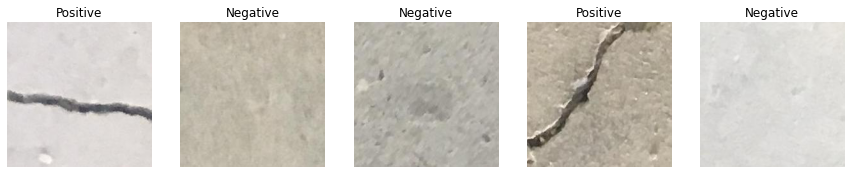

In [9]:
cracks = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(valid_pct = 0.3, seed = 42)
)
dls = cracks.dataloaders(path)
dls.valid.show_batch(max_n = 5, nrows = 1)


# Building the Model

In [10]:
model = cnn_learner(dls, resnet18, metrics = error_rate)
model.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.040645,0.011107,0.003917,01:59


epoch,train_loss,valid_loss,error_rate,time
0,0.006552,0.002275,0.000667,02:37


# Testing the Model


## Testing an image of a Cracked Surface

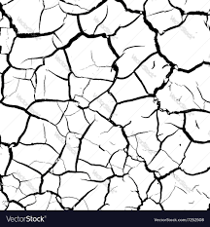

In [16]:
CrackedImg = PILImage.create(Path('./gdrive/MyDrive/Colab Notebooks/CrackedSurface.jpeg'))
CrackedImg.to_thumb(227)

In [19]:
model.predict(CrackedImg)

('Positive', tensor(1), tensor([8.5875e-05, 9.9991e-01]))

## Testing an image of an Uncracked Surface

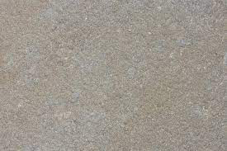

In [17]:
UncrackedImg = PILImage.create(Path('./gdrive/MyDrive/Colab Notebooks/UncrackedSurface.jpeg'))
UncrackedImg.to_thumb(227)

In [18]:
model.predict(UncrackedImg)

('Negative', tensor(0), tensor([0.9875, 0.0125]))

# Conclusion
As can be seen from the error rates generated above, the model delivers state-of-the-art performance (approximately 99.99% accuracy) and is able to correctly differentiate between cracked and uncracked surfaces. It is important to note, however, that the dataset did not require cleaning as it was already cleaned and completed at the time of downloading.

P.S. Confusion Matrix and other moddel performance indicators could not be computed due to hardware limitations (insufficient RAM).